Globally averaged temperature:

$$
\frac{dT}{dt} = R_i -  R_0(T, C)
$$


$$
R_i(T) = \frac{Q_0}{c} (1 - p \alpha_\text{land} - p \alpha_\text{oc}) 
$$

$$
R_o(T, C) = \frac{1}{c} (\kappa (T - T_\kappa) - a \ln (\frac{C}{C_0}) )
$$


Accumulated anthropogenic carbon, $S_a$
$$
\frac{d S_a}{dt} = C_a
$$

Atmospheric carbon concentration:

$$
\frac{dC}{dt} = v + C_a - W_a A_v C g^{vege}(T) + \frac{c_0}{\tau_c} \kappa_P (1 - f) + \frac{c_0}{\tau_c} \kappa_B(1 - f) - \frac{\lambda}{\tau_c} C(1 - f)
$$


$$
\kappa_P = \exp( - {\color{red}{b_P}} (T - T_0) )
$$

$$
b_P = \bar{b_p} + \sigma_P
$$

$$
\kappa_B = \exp({\color{red}{b_B}} (T - T_0))
$$

$$
b_B = \bar{b_B} + \sigma_B
$$

Temperature anomaly:
$$
\tilde{T} := T - T_{preindustrial}
$$

Carbon concentration anomaly:
$$
\tilde{C} := C - C_{preindustrial}
$$



$$
\begin{align}
\delta \phi(\tilde{T}, \tilde{C}) =& \max_{C_a} \delta \eta \log C_a  \\
& + \frac{d \phi (\tilde{T}, \tilde{C})}{d\tilde{T}}\frac{1}{c} \left(- \kappa \tilde{T} + a \ln(\tilde{C} + C_0) - a \ln(C_0) \right)\\
& + \frac{d\phi(\tilde{T}, \tilde{C} )}{d \tilde{C} } \left(  C_a - W_a A_v \tilde{C} + \frac{c_0}{\tau_c} \left(\kappa_P(\tilde{T} + T_{preindustrial}) - \kappa_P(T_{preindustrial}) \right) (1 - f)\\
+ \frac{c_0}{\tau_c} \left(\kappa_B(\tilde{T} + T_{preindustrial}) - \kappa_B(T_{preindustrial}) \right)  (1 - f) - \frac{\lambda}{\tau_c} \tilde{C}(1 - f)\right)\\
& + (\eta - 1) (\gamma_1 + \gamma_2 \tilde{T}) \frac{1}{c}\left(- \kappa \tilde{T} + a \ln(\tilde{C} + C_0) - a \ln(C_0) \right)
\end{align}
$$

$$
C_a^{*} = - \frac{ \delta \eta}{\frac{d \phi (\tilde{T}, \tilde{C})}{d \tilde{C}} }
$$

$$
c \dot{T}_{preindustrial} = 0 =  Q_0 (1 - p \alpha_{land} - (1 - p) \alpha_{ocean} ) - \kappa (T_{preindustrial} - T_{\kappa} ) + 5.35 \ln(\frac{C_{preindustrial} }{C_0})
$$

$$
\dot{C}_{preindustrial} = 0 = v - W_a A_v C_{preindustrial} + \frac{c_0}{\tau_c} \kappa_P(T_{preindustrial}) (1 - f) + \frac{c_0}{\tau_c} \kappa_B (T_{preindustrial}) (1 - f) - \frac{\lambda}{\tau_c} C_{preindustrial} (1  -f)
$$

In [487]:
import sys
sys.path.append("../src/")
import numpy as np
import pandas as pd
import pickle
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import SymLogNorm
import matplotlib.mlab
import scipy.io as sio
import pandas as pd
import scipy.optimize as optim
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy import fft, arange, signal
from scipy.interpolate import RegularGridInterpolator
import SolveLinSys
from supportfunctions import finiteDiff
rcParams["figure.figsize"] = (8,5)
rcParams["savefig.bbox"] = 'tight'
                                                                                
def PDESolver(stateSpace, A, B1, B2, C1, C2, D, v0, 
              ε = 1, tol = -10):                                              
                                                                                 

    A = A.reshape(-1,1,order = 'F')                                         
    B = np.hstack([B1.reshape(-1,1,order = 'F'),B2.reshape(-1,1,order = 'F')])
    C = np.hstack([C1.reshape(-1,1,order = 'F'),C2.reshape(-1,1,order = 'F')])
    D = D.reshape(-1,1,order = 'F')                                         
    v0 = v0.reshape(-1,1,order = 'F')                                       
    out = SolveLinSys.solveFT(stateSpace, A, B, C, D, v0, ε, tol)           

    return out                                                            

In [488]:
# Anthropogenic emissions (zero or one)
Can = pd.read_csv("rcp30co2eqv3.csv")
#times2co2eq
#rcp85co2eq.csv
Ca = Can[(Can["YEARS"] > 1799) & (Can["YEARS"] < 2801)]
Ca1 = Can[(Can["YEARS"] > 1799) & (Can["YEARS"] < 2801)]

Ca = Ca["CO2EQ"]
Ca = Ca - 281.69873
Ca = Ca.to_numpy()

Ce = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Ce)):
    if i == 0:
        Ce[i] = 0
    else:
        Ce[i] = Ca[i] - Ca[i-1] 
        
t_val = np.linspace(0, 1000, 1001)
def Yam(t):
    t_points = t_val
    em_points = Ce
    
    tck = interpolate.splrep(t_points, em_points)
    return interpolate.splev(t,tck)
        
Cebis = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Cebis)):
    if i == 0:
        Cebis[i] = 0
    else:
        Cebis[i] = max( Ca[i] - Ca[i-1], 0) 
        
Cc = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Cc)):
    if i == 0:
        Cc[i] = 0
    else:
        Cc[i] = sum(Cebis[0:i])

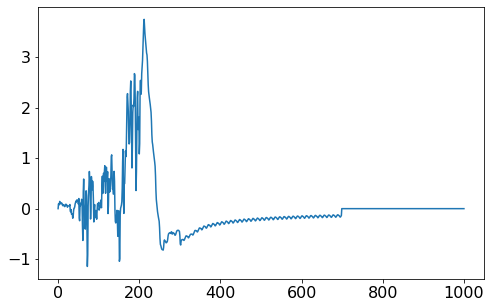

In [489]:
plt.plot(Ce)

In [491]:
# Pre-industrial: 282.87K

sa = 1
Ts = 282.9
Cs = 275.5

Q0 = 342.5
p = 0.3
# outgoing radiation linearized
kappa = 1.74
Tkappa = 154
## CO2 radiative forcing
# Greenhouse effect parameter
B = 5.35

alphaland = 0.28
bP = 0.05
sigma_P = 0.000
bB = 0.08
sigma_B = 0.0
cod = 0. # 2.5563471547779937 #3.035
cearth = 0.107
# cearth = 10.
tauc = 20
coc0 = 0. #350
## Ocean albedo parameters
Talphaocean_low = 219
Talphaocean_high = 299
alphaocean_max = 0.84
alphaocean_min = 0.255

Cbio_low = 50
Cbio_high = 700

T0 = 298
C0 = 280

## CO2 uptake by vegetation
wa = 0.015
vegcover = 0.4

Thigh = 315
Tlow = 282
Topt1 = 295
Topt2 = 310
acc = 5

## Volcanism
Volcan = 0.028


# def alphaocean(T):
#     """T, matrix, (nT, nC, nF)"""
#     temp = np.zeros(T.shape)
#     temp[ T< Talphaocean_low ] = alphaocean_max
#     temp[ (T>= Talphaocean_low)&(T< Talphaocean_high)] = alphaocean_max + (alphaocean_min - alphaocean_max) / (Talphaocean_high - Talphaocean_low) * (T[(T>= Talphaocean_low)&(T< Talphaocean_high)] - Talphaocean_low)
#     temp[T>= Talphaocean_high] = alphaocean_min

#     return temp

# alphaocean = (0.255 + 0.37 ) /2.
alphaocean = 0.3444045881126172

#Fraction of ocean covered by ice
# def fracseaice(T):
    
#     temp = np.zeros(T.shape)
#     temp[ T< Talphaocean_low ] = 1
#     temp[ (T>= Talphaocean_low)&(T< Talphaocean_high)] = 1 - 1 / (Talphaocean_high - Talphaocean_low) * (T[(T>= Talphaocean_low)&(T< Talphaocean_high)] - Talphaocean_low)
#     temp[T>= Talphaocean_high] = 0

#     return temp
    
fracseaice = 0.15
# fracseaice = 0.1


def biopump(F):
    """F, accumulated anthrpogenic emission"""
    temp = np.zeros(F.shape)
    
    temp[F < Cbio_low] = 1
    temp[(F >= Cbio_low)&(F < Cbio_high)] = 1 - 1/(Cbio_high - Cbio_low) * (F[(F >= Cbio_low)&(F < Cbio_high)] - Cbio_low)
    temp[F >= Cbio_high] = 0
    return temp


def veggrowth(T):
    
    temp = np.zeros(T.shape)
    
    temp[T < Tlow] = 0
    temp[(T >= Tlow)&(T < Topt1)] = acc / (Topt1 - Tlow) * (T[(T >= Tlow)&(T < Topt1)] - Tlow)
    temp[(T >= Topt1)&(T < Topt2)] = acc
    temp[(T >= Topt2)&(T < Thigh)] = acc / (Topt2 - Thigh) * (T[(T >= Topt2)&(T < Thigh)] - Thigh)
    temp[T > Thigh] = 0
    
    return temp


#Incoming radiation modified by albedo
# def Ri(T):
#     return 1/cearth * (Q0 * (1 - p * alphaland - (1 - p) * alphaocean) )

Ri = 1 / cearth * Q0 * (1 - p * alphaland - (1 - p) * alphaocean)

# Outgoing radiation modified by greenhouse effect
def Ro(T, C):
    return 1/cearth * (kappa * (T - Tkappa) -  B * np.log(C / C0))

#Solubility of atmospheric carbon into the oceans
# carbon pumps
def kappaP(T, W):
    return np.exp(-(bP + sigma_P * W) * (T - T0))

def oceanatmphysflux(T, W):
    return 1 / tauc * (coc0 * (np.exp(-(bP + sigma_P * W) * (T - T0))))

def oceanbioflux(T, W, sa):
    
    if sa == 1:
        
        return 1/tauc * (coc0 * (np.exp( (bB + sigma_B * W) * (T - T0))))
    
    elif sa == 0:
        
        return 1/tauc * (coc0 * (np.exp(bB * (T - T0))))
    
    else:
        return ValueError("Wrong input value: 0 or 1.")

def oceanatmcorrflux(C):
    return 1 / tauc * (- cod * C)

In [504]:
def dydt(t, y):
    T = y[0]
    C = y[1]

    dT = 1. / cearth * ( - kappa * T + B * np.log(C + C0) - B * np.log(C0))
#     dT -= Ro(T, C)
    Ws = np.random.normal(size=(2,1))
#     dC = Volcan
    dC = Yam(t) - (Volcan / C_preindustrial * C + (1 - fracseaice) * cod / tauc * C) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T + T_preindustrial - T0) - np.exp(-bP * (T_preindustrial - T0)))) + coc0 / tauc * (1 - fracseaice) * (np.exp(bB * (T + T_preindustrial - T0) - np.exp(bB * (T_preindustrial - T0))))   # biological pump flux * fraction sea ice
#     dC += oceanbioflux(T) * (1 - fracseaice(T))      # biological pump flux * fraction sea ice
#     dC += oceanatmcorrflux(C) * (1 - fracseaice)    # correction parameter

    return dT, dC

In [505]:
T_preindustrial = 286.85
C_preindustrial = 280
(1  - kappa / Q0 * (T_preindustrial - Tkappa) - p * alphaland ) / (1 - p) 

0.3444045881126172

In [494]:
Volcan - wa * vegcover * C_preindustrial + (1 - fracseaice) * coc0 / tauc * (np.exp(-bP * (T_preindustrial - T0)) + np.exp(bB * (T_preindustrial - T0))) - cod / tauc * C_preindustrial * (1 - fracseaice)

-1.652

In [495]:
Q0 * (1 - p * alphaland - (1 - p) * alphaocean) - kappa * (T_preindustrial - Tkappa) 

-2.842170943040401e-14

In [496]:
wa * vegcover

0.006

In [497]:
LHS = - Volcan + wa * C_preindustrial * vegcover

RHS  = coc0 / tauc * np.exp(-bP * (T_preindustrial - T0)) + coc0 / tauc * np.exp(bB * (T_preindustrial - T0)) 
temp = - cod / tauc * C_preindustrial

- LHS, RHS, ( RHS * (1-0.15) + Volcan ) / C_preindustrial

(-1.6520000000000001, 0.0, 0.0001)

In [498]:
(- LHS + RHS * (1 - 0.15)) / (1 - 0.15) * tauc / C_preindustrial

-0.1388235294117647

In [506]:
# init = [Ts, Cs]
init = [0,0]
t_eval = np.linspace(0, 1000, 100000)
sol = solve_ivp(dydt, t_eval[[0, -1]], init, t_eval=t_eval, method='RK45', max_step=0.1)

In [507]:
#Extract values of temperature and C02
Tv = sol.y[0, :]
Cv = sol.y[1, :]
tv = sol.t

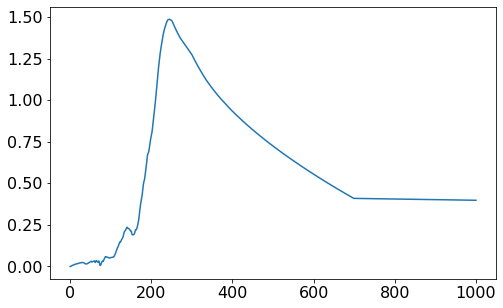

In [508]:
plt.plot(tv, Tv )#- 282.86880986118945)
# plt.xlim(0,100)
# plt.ylim(-10, 0)

In [510]:
# np.save("data_30.npy", [tv, Tv, Cv])

Text(0.5, 0, 'Years')

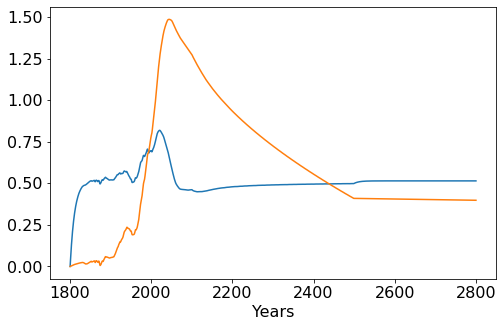

In [511]:
res30 = np.load("data_30.npy")
res45 = np.load("data_45.npy")
res60 = np.load("data_60.npy")
res85 = np.load("data_85.npy")

plt.plot(res30[0] + 1800, res30[1])
plt.plot(tv + 1800, Tv)
# plt.plot(res45[0] + 1800, res45[1])
# plt.plot(res60[0] + 1800, res60[1])
# plt.plot(res85[0] + 1800, res85[1])
plt.xlabel("Years")

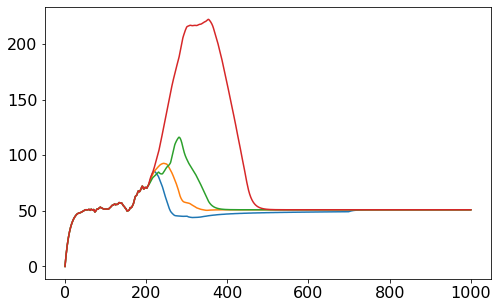

In [512]:
res30 = np.load("data_30.npy")
res45 = np.load("data_45.npy")
res60 = np.load("data_60.npy")
res85 = np.load("data_85.npy")

plt.plot(res30[0], res30[2])
plt.plot(res45[0], res45[2])
plt.plot(res60[0], res60[2])
plt.plot(res85[0], res85[2])

In [806]:
# Economic paramaters
gamma_1 = 1.7675 / 10000.
gamma_2 = 2 * 0.0022
delta   = 0.01
eta     = 0.032

# State variable
# Temperature anomaly, in celsius
T_min  = 0. 
T_max  = 3. # 
hT     = 0.1
T_grid = np.arange(T_min, T_max + hT, hT)

# atmospheric carbon concentration, in gigaton
C_min  = 0.
C_max  = 500.
hC     = 10.
C_grid = np.arange(C_min, C_max + hC, hC)

# F, Sa in the notes, accumulative anthropogenic carbon, in gigaton
F_min = 10. # 10. avaoid 
F_max = 2500. # 2500 x2.13 gm # # on hold -> 4000 / 2.13 ppm
hF = 50.
F_grid = np.arange(F_min, F_max + hF, hF)

# meshgrid
(T_mat, C_mat) = np.meshgrid(T_grid, C_grid, indexing="ij")
stateSpace = np.hstack([
    T_mat.reshape(-1, 1, order="F"),
    C_mat.reshape(-1, 1, order="F"),
#     F_mat.reshape(-1, 1, order="F")
])

T_mat.shape

(31, 51)

In [804]:
v0 =  - eta * delta * C_mat

# v0 =  delta * eta * np.log(delta /4 * (9000/2.13 - F_mat)) + (eta - 1) * gamma_2 * T_mat / cearth * (B * np.log(C_mat/ C0) + kappa * (T_mat + To - Tkappa))

dG  = gamma_1 + gamma_2 * T_mat
epsilon  = 0.1
count    = 0
error    = 1.
tol      = 1e-8
max_iter = 6000
fraction = 0.1
cearth = 0.107
# cearth = 10.

while error > tol and count < max_iter:
    
    dvdT  = finiteDiff(v0, 0, 1, hT)
    dvdTT = finiteDiff(v0, 0, 2, hT)
    dvdC  = finiteDiff(v0, 1, 1, hC)
#     dvdC[dvdC >= - 1e-16] = - 1e-16
    dvdCC = finiteDiff(v0, 1, 2, hC)
#     dvdF  = finiteDiff(v0, 2, 1, hF)
#     dvdFF = finiteDiff(v0, 2, 2, hF)
        

    Ca = - eta * delta / dvdC

    
    if count >=1:
        Ca = Ca * fraction + Ca_star * (1 - fraction)

    
    Ca[Ca <= 1e-32] = 1e-32
    
#     Ca = 1. * np.ones(T_mat.shape)
    
    A  = - delta * np.ones(T_mat.shape)
    B1 = 1. / cearth * ( - 2 * kappa * T_mat + B * np.log(C_mat + C0) - B * np.log(C0))
    B2 = Ca # - Volcan / C_preindustrial  * C_mat # - ( (1 - fracseaice) * cod / tauc) * C_mat + coc0 / tauc * (1 - fracseaice) * (np.exp( bB * (T_mat + T_preindustrial - T0)) - np.exp( bB * (T_preindustrial - T0))) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T_mat + T_preindustrial - T0)) - np.exp(-bP * (T_preindustrial - T0)))
    C1 = 0.0 * np.ones(T_mat.shape)
    C2 = 0.0 * np.ones(T_mat.shape)
    D  = eta * delta * np.log(Ca) + (eta - 1) * dG * B1

    out = PDESolver(stateSpace, A, B1, B2, C1, C2, D, v0, epsilon)
    v = out[2].reshape(v0.shape, order="F")

    rhs_error = A * v0 + B1 * dvdT + B2 * dvdC + C1 * dvdTT + C2 * dvdCC + D
    rhs_error = np.max(abs(rhs_error))
    lhs_error = np.max(abs((v - v0)/epsilon))

    error = lhs_error
    v0 = v
    Ca_star = Ca
    count += 1

    print("Iteration: %s;\t False Transient Error: %s;\t PDE Error: %s\t" % (count, lhs_error, rhs_error))

print("Total iteration: %s;\t LHS Error: %s;\t RHS Error %s\t" % (count, lhs_error, rhs_error))

Iteration: 1;	 False Transient Error: 0.17817566238090152;	 PDE Error: 1.263085283738318	
Iteration: 2;	 False Transient Error: 0.029532237957753393;	 PDE Error: 0.17817567894407405	
Iteration: 3;	 False Transient Error: 0.007705516148349967;	 PDE Error: 0.029535810270477247	
Iteration: 4;	 False Transient Error: 0.0036489799149380664;	 PDE Error: 0.0353948915176141	
Iteration: 5;	 False Transient Error: 0.0027607161941992087;	 PDE Error: 0.0384598757760779	
Iteration: 6;	 False Transient Error: 0.002559638889161331;	 PDE Error: 0.0389559930574912	
Iteration: 7;	 False Transient Error: 0.002511575550493972;	 PDE Error: 0.03903768634096738	
Iteration: 8;	 False Transient Error: 0.0024981785772185128;	 PDE Error: 0.039047144316742166	
Iteration: 9;	 False Transient Error: 0.0024927220968001818;	 PDE Error: 0.03904290984320635	
Iteration: 10;	 False Transient Error: 0.0024890938370811244;	 PDE Error: 0.03903582133092631	
Iteration: 11;	 False Transient Error: 0.0024858841103103657;	 PDE E

Iteration: 162;	 False Transient Error: 0.0020039541234495584;	 PDE Error: 0.038146209006402865	
Iteration: 163;	 False Transient Error: 0.0020007727010531995;	 PDE Error: 0.03814718830004571	
Iteration: 164;	 False Transient Error: 0.001997586743774926;	 PDE Error: 0.03814816254606801	
Iteration: 165;	 False Transient Error: 0.0019943962871465937;	 PDE Error: 0.038149131727786445	
Iteration: 166;	 False Transient Error: 0.001991200866703069;	 PDE Error: 0.03815009623258092	
Iteration: 167;	 False Transient Error: 0.0019880003371089416;	 PDE Error: 0.03815105615131076	
Iteration: 168;	 False Transient Error: 0.0019847946343942713;	 PDE Error: 0.03815201144693292	
Iteration: 169;	 False Transient Error: 0.0019815831561327546;	 PDE Error: 0.03815296214386765	
Iteration: 170;	 False Transient Error: 0.0019783657772168284;	 PDE Error: 0.03815390844431632	
Iteration: 171;	 False Transient Error: 0.001975142198612778;	 PDE Error: 0.03815485024979104	
Iteration: 172;	 False Transient Error: 0

Iteration: 316;	 False Transient Error: 0.04425298276567208;	 PDE Error: 0.17911984484336946	
Iteration: 317;	 False Transient Error: 0.028501315103574287;	 PDE Error: 0.15088682074281948	
Iteration: 318;	 False Transient Error: 0.021520839842828765;	 PDE Error: 0.12673716934941692	
Iteration: 319;	 False Transient Error: 0.02152804781586387;	 PDE Error: 0.10740113557422143	
Iteration: 320;	 False Transient Error: 0.021528607343592188;	 PDE Error: 0.09175028382594344	
Iteration: 321;	 False Transient Error: 0.02152321200418278;	 PDE Error: 0.07875746057853861	
Iteration: 322;	 False Transient Error: 0.021512676449230855;	 PDE Error: 0.06777509220252224	
Iteration: 323;	 False Transient Error: 0.021497772067777254;	 PDE Error: 0.05840056054484843	
Iteration: 324;	 False Transient Error: 0.021479200413395266;	 PDE Error: 0.05035708659736382	
Iteration: 325;	 False Transient Error: 0.021457589747123917;	 PDE Error: 0.05502391519200839	
Iteration: 326;	 False Transient Error: 0.02235896387

Iteration: 461;	 False Transient Error: 0.0213378788649745;	 PDE Error: 0.14778060380462538	
Iteration: 462;	 False Transient Error: 0.021331869017420565;	 PDE Error: 0.14100497649817972	
Iteration: 463;	 False Transient Error: 0.021343937103630584;	 PDE Error: 0.13262616944685388	
Iteration: 464;	 False Transient Error: 0.021356205131799963;	 PDE Error: 0.12320199076646765	
Iteration: 465;	 False Transient Error: 0.021368904808967432;	 PDE Error: 0.11319722720216156	
Iteration: 466;	 False Transient Error: 0.02138212797872914;	 PDE Error: 0.10298874431029406	
Iteration: 467;	 False Transient Error: 0.021506606929956908;	 PDE Error: 0.09287358113373448	
Iteration: 468;	 False Transient Error: 0.021738555241593925;	 PDE Error: 0.09034699254590005	
Iteration: 469;	 False Transient Error: 0.02359112872584961;	 PDE Error: 0.09389862116352443	
Iteration: 470;	 False Transient Error: 0.02348262504579002;	 PDE Error: 0.09616249924827586	
Iteration: 471;	 False Transient Error: 0.0239027632149

Iteration: 615;	 False Transient Error: 0.02279254165792971;	 PDE Error: 0.2752597910202016	
Iteration: 616;	 False Transient Error: 0.021968275520615893;	 PDE Error: 0.25175183877962337	
Iteration: 617;	 False Transient Error: 0.021946329302642564;	 PDE Error: 0.2264827264502728	
Iteration: 618;	 False Transient Error: 0.021924403466688225;	 PDE Error: 0.2032652946462805	
Iteration: 619;	 False Transient Error: 0.021902502372163624;	 PDE Error: 0.1822856980154918	
Iteration: 620;	 False Transient Error: 0.021880622310993247;	 PDE Error: 0.16339705470835364	
Iteration: 621;	 False Transient Error: 0.021858763984174967;	 PDE Error: 0.1464249290942275	
Iteration: 622;	 False Transient Error: 0.02183692394506692;	 PDE Error: 0.13119858634227735	
Iteration: 623;	 False Transient Error: 0.021815107531223954;	 PDE Error: 0.11755626943384413	
Iteration: 624;	 False Transient Error: 0.021793313997673508;	 PDE Error: 0.10534690171698582	
Iteration: 625;	 False Transient Error: 0.021771542686767

Iteration: 761;	 False Transient Error: 0.021489563281776314;	 PDE Error: 0.04549368425433442	
Iteration: 762;	 False Transient Error: 0.021468093639933628;	 PDE Error: 0.04547302003188536	
Iteration: 763;	 False Transient Error: 0.02144664615182784;	 PDE Error: 0.04545237671250335	
Iteration: 764;	 False Transient Error: 0.02142522066661212;	 PDE Error: 0.04543175392932808	
Iteration: 765;	 False Transient Error: 0.02140381675717895;	 PDE Error: 0.045411151665684546	
Iteration: 766;	 False Transient Error: 0.021382434263064465;	 PDE Error: 0.045390569936523906	
Iteration: 767;	 False Transient Error: 0.021361076264088674;	 PDE Error: 0.045370008790710514	
Iteration: 768;	 False Transient Error: 0.021339734397979038;	 PDE Error: 0.045349467834373325	
Iteration: 769;	 False Transient Error: 0.021318415579883176;	 PDE Error: 0.04532894786251829	
Iteration: 770;	 False Transient Error: 0.021297118339514143;	 PDE Error: 0.045308448282600944	
Iteration: 771;	 False Transient Error: 0.021275

Iteration: 910;	 False Transient Error: 0.1421754239860537;	 PDE Error: 0.04119430364491039	
Iteration: 911;	 False Transient Error: 0.04773431939251588;	 PDE Error: 0.33204527942118034	
Iteration: 912;	 False Transient Error: 0.02409734668165686;	 PDE Error: 0.36974358118272344	
Iteration: 913;	 False Transient Error: 0.01969101245530458;	 PDE Error: 0.35077598423300654	
Iteration: 914;	 False Transient Error: 0.019577879756521588;	 PDE Error: 0.326319640063939	
Iteration: 915;	 False Transient Error: 0.019558321444475557;	 PDE Error: 0.3033601287300748	
Iteration: 916;	 False Transient Error: 0.019538782817687395;	 PDE Error: 0.28244293682777893	
Iteration: 917;	 False Transient Error: 0.019519263895035888;	 PDE Error: 0.2633204416372805	
Iteration: 918;	 False Transient Error: 0.01949976418968935;	 PDE Error: 0.24571286956444172	
Iteration: 919;	 False Transient Error: 0.019480284992178243;	 PDE Error: 0.22939750732435377	
Iteration: 920;	 False Transient Error: 0.019460824061208748

Iteration: 1040;	 False Transient Error: 0.019442850096320075;	 PDE Error: 0.03872825211536768	
Iteration: 1041;	 False Transient Error: 0.01942342665083252;	 PDE Error: 0.03870882799440445	
Iteration: 1042;	 False Transient Error: 0.019404022603891624;	 PDE Error: 0.038689423272639356	
Iteration: 1043;	 False Transient Error: 0.01938463794178391;	 PDE Error: 0.03867291341273438	
Iteration: 1044;	 False Transient Error: 0.019365272647546283;	 PDE Error: 0.03867308904564104	
Iteration: 1045;	 False Transient Error: 0.019345926685001014;	 PDE Error: 0.03867326422984796	
Iteration: 1046;	 False Transient Error: 0.01932660005283693;	 PDE Error: 0.0386734389618677	
Iteration: 1047;	 False Transient Error: 0.0193072927223914;	 PDE Error: 0.03867361324878349	
Iteration: 1048;	 False Transient Error: 0.019288004674345438;	 PDE Error: 0.03867378708733549	
Iteration: 1049;	 False Transient Error: 0.01926873588368072;	 PDE Error: 0.03867396048474725	
Iteration: 1050;	 False Transient Error: 0.019

Iteration: 1176;	 False Transient Error: 0.01967693827917838;	 PDE Error: 0.03877947480053334	
Iteration: 1177;	 False Transient Error: 0.019657281510090385;	 PDE Error: 0.03875979786383269	
Iteration: 1178;	 False Transient Error: 0.01963764383078992;	 PDE Error: 0.0387401406674517	
Iteration: 1179;	 False Transient Error: 0.019618025138309902;	 PDE Error: 0.038720503235025495	
Iteration: 1180;	 False Transient Error: 0.01959842633228792;	 PDE Error: 0.03870088474190321	
Iteration: 1181;	 False Transient Error: 0.019578847329796423;	 PDE Error: 0.03869337016498364	
Iteration: 1182;	 False Transient Error: 0.019559287990641994;	 PDE Error: 0.03869349358397689	
Iteration: 1183;	 False Transient Error: 0.019539748241332866;	 PDE Error: 0.038693616716614754	
Iteration: 1184;	 False Transient Error: 0.019520228043016785;	 PDE Error: 0.038693739546797	
Iteration: 1185;	 False Transient Error: 0.019500727356230874;	 PDE Error: 0.03869386206780967	
Iteration: 1186;	 False Transient Error: 0.0

Iteration: 1303;	 False Transient Error: 0.017331242333253893;	 PDE Error: 0.038706261784605234	
Iteration: 1304;	 False Transient Error: 0.017313928368140052;	 PDE Error: 0.038706350731282146	
Iteration: 1305;	 False Transient Error: 0.017296631703398457;	 PDE Error: 0.03870643942834184	
Iteration: 1306;	 False Transient Error: 0.017279352321426522;	 PDE Error: 0.03870652787647133	
Iteration: 1307;	 False Transient Error: 0.017262090204409608;	 PDE Error: 0.03870661607591286	
Iteration: 1308;	 False Transient Error: 0.017244845334820624;	 PDE Error: 0.0387067040265523	
Iteration: 1309;	 False Transient Error: 0.01722761769522907;	 PDE Error: 0.03870679172863878	
Iteration: 1310;	 False Transient Error: 0.017210407267913563;	 PDE Error: 0.03870687918351967	
Iteration: 1311;	 False Transient Error: 0.01719321403561236;	 PDE Error: 0.038706966390838815	
Iteration: 1312;	 False Transient Error: 0.017176037980892733;	 PDE Error: 0.03870705335092328	
Iteration: 1313;	 False Transient Error:

Iteration: 1437;	 False Transient Error: 0.022393804840169437;	 PDE Error: 0.18846404550728516	
Iteration: 1438;	 False Transient Error: 0.02237532606740332;	 PDE Error: 0.1712332408030682	
Iteration: 1439;	 False Transient Error: 0.02236931360984136;	 PDE Error: 0.15434377794112214	
Iteration: 1440;	 False Transient Error: 0.022364711014682126;	 PDE Error: 0.14964528271903954	
Iteration: 1441;	 False Transient Error: 0.02236100291073656;	 PDE Error: 0.14985870058461753	
Iteration: 1442;	 False Transient Error: 0.02239480478730599;	 PDE Error: 0.14884514832731538	
Iteration: 1443;	 False Transient Error: 0.02497679319238437;	 PDE Error: 0.1467727107228572	
Iteration: 1444;	 False Transient Error: 0.02320887977153782;	 PDE Error: 0.14379931362905446	
Iteration: 1445;	 False Transient Error: 0.022012803966822078;	 PDE Error: 0.14007687546899786	
Iteration: 1446;	 False Transient Error: 0.02169875948831168;	 PDE Error: 0.1301522681664028	
Iteration: 1447;	 False Transient Error: 0.0215914

Iteration: 1563;	 False Transient Error: 0.021246724574863485;	 PDE Error: 0.04671571490974913	
Iteration: 1564;	 False Transient Error: 0.0211647776598875;	 PDE Error: 0.046764546927150485	
Iteration: 1565;	 False Transient Error: 0.021130463001549082;	 PDE Error: 0.046781281678389464	
Iteration: 1566;	 False Transient Error: 0.02110631580878264;	 PDE Error: 0.046771341451440684	
Iteration: 1567;	 False Transient Error: 0.021787305142930424;	 PDE Error: 0.04675335593336438	
Iteration: 1568;	 False Transient Error: 0.021765452730475865;	 PDE Error: 0.04673310762673932	
Iteration: 1569;	 False Transient Error: 0.021743693004518394;	 PDE Error: 0.046712261965747515	
Iteration: 1570;	 False Transient Error: 0.02172196450405839;	 PDE Error: 0.04669127519479854	
Iteration: 1571;	 False Transient Error: 0.021700263061469605;	 PDE Error: 0.04667026793543905	
Iteration: 1572;	 False Transient Error: 0.06863856786206102;	 PDE Error: 0.04664926928637203	
Iteration: 1573;	 False Transient Error: 

Iteration: 1695;	 False Transient Error: 0.02046769688859723;	 PDE Error: 0.04291277531337334	
Iteration: 1696;	 False Transient Error: 0.02044724955732491;	 PDE Error: 0.04289247225079329	
Iteration: 1697;	 False Transient Error: 0.020426822614683093;	 PDE Error: 0.04287218950210714	
Iteration: 1698;	 False Transient Error: 0.020406416071996336;	 PDE Error: 0.04285192704399765	
Iteration: 1699;	 False Transient Error: 0.02038602993013311;	 PDE Error: 0.042831684835180184	
Iteration: 1700;	 False Transient Error: 0.020365664210248435;	 PDE Error: 0.042811462834824066	
Iteration: 1701;	 False Transient Error: 0.020345318924399614;	 PDE Error: 0.042791260995819536	
Iteration: 1702;	 False Transient Error: 0.02032499402650323;	 PDE Error: 0.04277107929250468	
Iteration: 1703;	 False Transient Error: 0.020304689224051597;	 PDE Error: 0.042750917731833926	
Iteration: 1704;	 False Transient Error: 0.020284404762073716;	 PDE Error: 0.04273077642298484	
Iteration: 1705;	 False Transient Error:

Iteration: 1826;	 False Transient Error: 0.01887900980575341;	 PDE Error: 0.13873658233216765	
Iteration: 1827;	 False Transient Error: 0.01886014965290006;	 PDE Error: 0.1278470500439068	
Iteration: 1828;	 False Transient Error: 0.018841308343757746;	 PDE Error: 0.11778770241256668	
Iteration: 1829;	 False Transient Error: 0.018822485858890903;	 PDE Error: 0.10849537781306678	
Iteration: 1830;	 False Transient Error: 0.018803682178437087;	 PDE Error: 0.0999124075905912	
Iteration: 1831;	 False Transient Error: 0.01878489728182109;	 PDE Error: 0.09198586747918311	
Iteration: 1832;	 False Transient Error: 0.01876613115152137;	 PDE Error: 0.08466697965754083	
Iteration: 1833;	 False Transient Error: 0.01874738376826446;	 PDE Error: 0.07791062546396701	
Iteration: 1834;	 False Transient Error: 0.018728655113386394;	 PDE Error: 0.07167494027786407	
Iteration: 1835;	 False Transient Error: 0.018709945167916242;	 PDE Error: 0.06592096584343199	
Iteration: 1836;	 False Transient Error: 0.0186

Iteration: 1948;	 False Transient Error: 0.01957690085906072;	 PDE Error: 0.04026278761015309	
Iteration: 1949;	 False Transient Error: 0.02004247798689185;	 PDE Error: 0.04502188819367903	
Iteration: 1950;	 False Transient Error: 0.020270190289440326;	 PDE Error: 0.0529192468690798	
Iteration: 1951;	 False Transient Error: 0.019466641320389222;	 PDE Error: 0.04276108320323059	
Iteration: 1952;	 False Transient Error: 0.019454239453390865;	 PDE Error: 0.04151069636407012	
Iteration: 1953;	 False Transient Error: 0.01996575650168808;	 PDE Error: 0.056014086509593754	
Iteration: 1954;	 False Transient Error: 0.021566445246723465;	 PDE Error: 0.04561833226228696	
Iteration: 1955;	 False Transient Error: 0.020224286553215953;	 PDE Error: 0.044543917111270113	
Iteration: 1956;	 False Transient Error: 0.0194779855785554;	 PDE Error: 0.044358275066602136	
Iteration: 1957;	 False Transient Error: 0.019703213642749406;	 PDE Error: 0.05888043303709519	
Iteration: 1958;	 False Transient Error: 0.

Iteration: 2068;	 False Transient Error: 8.40728891064714;	 PDE Error: 242.49649849743415	
Iteration: 2069;	 False Transient Error: 7.341915840760578;	 PDE Error: 218.49484631183896	
Iteration: 2070;	 False Transient Error: 6.378246713364604;	 PDE Error: 196.77973609889227	
Iteration: 2071;	 False Transient Error: 5.507156034751688;	 PDE Error: 177.14596052134917	
Iteration: 2072;	 False Transient Error: 4.720226229301261;	 PDE Error: 159.40424170601403	
Iteration: 2073;	 False Transient Error: 4.009715740712068;	 PDE Error: 143.38051099550066	
Iteration: 2074;	 False Transient Error: 3.3685231003607896;	 PDE Error: 128.91509864838395	
Iteration: 2075;	 False Transient Error: 2.7901486748845628;	 PDE Error: 115.86187186442912	
Iteration: 2076;	 False Transient Error: 2.2686554045449725;	 PDE Error: 104.08735052337954	
Iteration: 2077;	 False Transient Error: 1.7986295205034253;	 PDE Error: 93.46982279416434	
Iteration: 2078;	 False Transient Error: 1.375141984080983;	 PDE Error: 84.040

Iteration: 2240;	 False Transient Error: 2.1194296244993893;	 PDE Error: 2.140631897275054	
Iteration: 2241;	 False Transient Error: 2.117312312496722;	 PDE Error: 2.1385124686232437	
Iteration: 2242;	 False Transient Error: 2.1151971157544835;	 PDE Error: 2.136395157140261	
Iteration: 2243;	 False Transient Error: 2.113084032020822;	 PDE Error: 2.134279960936644	
Iteration: 2244;	 False Transient Error: 2.1109730591859943;	 PDE Error: 2.132166877886683	
Iteration: 2245;	 False Transient Error: 2.1088641951530462;	 PDE Error: 2.1300559059080695	
Iteration: 2246;	 False Transient Error: 2.106757437798308;	 PDE Error: 2.127947042822099	
Iteration: 2247;	 False Transient Error: 2.1046527850330676;	 PDE Error: 2.1258402864775925	
Iteration: 2248;	 False Transient Error: 2.102550234801299;	 PDE Error: 2.1237356347572414	
Iteration: 2249;	 False Transient Error: 2.1004497853721205;	 PDE Error: 2.121633085523569	
Iteration: 2250;	 False Transient Error: 2.098351432272807;	 PDE Error: 2.119532

Iteration: 2405;	 False Transient Error: 1.7971992094612688;	 PDE Error: 1.818079266203377	
Iteration: 2406;	 False Transient Error: 1.7954038055469823;	 PDE Error: 1.8162820668827104	
Iteration: 2407;	 False Transient Error: 1.7936101953426942;	 PDE Error: 1.8144866629373497	
Iteration: 2408;	 False Transient Error: 1.7918183769603502;	 PDE Error: 1.8126930525799763	
Iteration: 2409;	 False Transient Error: 1.7900283486028457;	 PDE Error: 1.8109012341903248	
Iteration: 2410;	 False Transient Error: 1.7882401084870025;	 PDE Error: 1.8091112057908874	
Iteration: 2411;	 False Transient Error: 1.7864536548177057;	 PDE Error: 1.8073229656029688	
Iteration: 2412;	 False Transient Error: 1.7846689858217246;	 PDE Error: 1.8055365119831086	
Iteration: 2413;	 False Transient Error: 1.782886099711618;	 PDE Error: 1.8037518430004655	
Iteration: 2414;	 False Transient Error: 1.7811049947044921;	 PDE Error: 1.8019689568530906	
Iteration: 2415;	 False Transient Error: 1.7793256690262638;	 PDE Error:

Iteration: 2561;	 False Transient Error: 1.5377301593218817;	 PDE Error: 1.5583507486160126	
Iteration: 2562;	 False Transient Error: 1.5361939653604395;	 PDE Error: 1.5568130184630524	
Iteration: 2563;	 False Transient Error: 1.5346593060550617;	 PDE Error: 1.555276824545359	
Iteration: 2564;	 False Transient Error: 1.5331261798769447;	 PDE Error: 1.5537421651884677	
Iteration: 2565;	 False Transient Error: 1.531594584781999;	 PDE Error: 1.5522090389990661	
Iteration: 2566;	 False Transient Error: 1.530064519968164;	 PDE Error: 1.5506774439599071	
Iteration: 2567;	 False Transient Error: 1.528535983875372;	 PDE Error: 1.5491473791412578	
Iteration: 2568;	 False Transient Error: 1.5270089750850957;	 PDE Error: 1.5476188430970086	
Iteration: 2569;	 False Transient Error: 1.5254834914389903;	 PDE Error: 1.5460918345033685	
Iteration: 2570;	 False Transient Error: 1.523959532066499;	 PDE Error: 1.5445663509643057	
Iteration: 2571;	 False Transient Error: 1.5224370949971444;	 PDE Error: 1.

Iteration: 2706;	 False Transient Error: 1.330267238842282;	 PDE Error: 1.3506803653594492	
Iteration: 2707;	 False Transient Error: 1.3289383005653121;	 PDE Error: 1.3493500981396864	
Iteration: 2708;	 False Transient Error: 1.3276106898976536;	 PDE Error: 1.348021159835954	
Iteration: 2709;	 False Transient Error: 1.326284405508602;	 PDE Error: 1.3466935492064458	
Iteration: 2710;	 False Transient Error: 1.3249594460785374;	 PDE Error: 1.3453672648263675	
Iteration: 2711;	 False Transient Error: 1.323635810285566;	 PDE Error: 1.3440423053993642	
Iteration: 2712;	 False Transient Error: 1.3223134968023942;	 PDE Error: 1.342718669630398	
Iteration: 2713;	 False Transient Error: 1.3209925043105386;	 PDE Error: 1.3413963561208946	
Iteration: 2714;	 False Transient Error: 1.3196728314909478;	 PDE Error: 1.3400753636197695	
Iteration: 2715;	 False Transient Error: 1.3183544770231492;	 PDE Error: 1.3387556908009928	
Iteration: 2716;	 False Transient Error: 1.3170374395949125;	 PDE Error: 1.

Iteration: 2869;	 False Transient Error: 1.1302753765912144;	 PDE Error: 1.1504885113444394	
Iteration: 2870;	 False Transient Error: 1.1291462303582023;	 PDE Error: 1.1493582359837362	
Iteration: 2871;	 False Transient Error: 1.128018212142905;	 PDE Error: 1.148229089737492	
Iteration: 2872;	 False Transient Error: 1.1268913208198228;	 PDE Error: 1.1471010715205847	
Iteration: 2873;	 False Transient Error: 1.125765555260756;	 PDE Error: 1.1459741802331314	
Iteration: 2874;	 False Transient Error: 1.1246409143436153;	 PDE Error: 1.1448484146429176	
Iteration: 2875;	 False Transient Error: 1.123517396943896;	 PDE Error: 1.143723773706333	
Iteration: 2876;	 False Transient Error: 1.1223950019386564;	 PDE Error: 1.1426002563411672	
Iteration: 2877;	 False Transient Error: 1.121273728206944;	 PDE Error: 1.1414778613312866	
Iteration: 2878;	 False Transient Error: 1.1201535746288016;	 PDE Error: 1.1403565875935482	
Iteration: 2879;	 False Transient Error: 1.119034540087398;	 PDE Error: 1.13

Iteration: 3024;	 False Transient Error: 0.9680599585240657;	 PDE Error: 0.9881108779523915	
Iteration: 3025;	 False Transient Error: 0.9670928656541378;	 PDE Error: 0.9871428179827462	
Iteration: 3026;	 False Transient Error: 0.9661267389118677;	 PDE Error: 0.9861757251043823	
Iteration: 3027;	 False Transient Error: 0.9651615773307753;	 PDE Error: 0.9852095983479945	
Iteration: 3028;	 False Transient Error: 0.9641973799472225;	 PDE Error: 0.984244436772254	
Iteration: 3029;	 False Transient Error: 0.9632341457967186;	 PDE Error: 0.9832802393907201	
Iteration: 3030;	 False Transient Error: 0.9622718739191782;	 PDE Error: 0.9823170052385699	
Iteration: 3031;	 False Transient Error: 0.9613105633522423;	 PDE Error: 0.9813547333471739	
Iteration: 3032;	 False Transient Error: 0.9603502131361097;	 PDE Error: 0.9803934228203663	
Iteration: 3033;	 False Transient Error: 0.9593908223089898;	 PDE Error: 0.9794330725976985	
Iteration: 3034;	 False Transient Error: 0.9584323899142078;	 PDE Error

KeyboardInterrupt: 

In [802]:
Ca

array([[11.92441407, 10.42102382,  9.291623  ,  9.90726614,  8.26621331,
         5.36594375,  3.97032242,  4.06885542,  5.91586659,  5.02435262,
         3.70424642,  4.69533391,  4.08026539,  3.95167597,  3.95430211,
         3.32375945,  3.24659797,  2.99371418,  2.78889603,  2.75583855,
         2.43629469,  2.62426196,  2.32800694,  2.31401433,  2.21820316,
         1.60405854],
       [11.10488149, 10.08535619,  9.27778688,  9.90951851,  8.27517499,
         5.36729507,  3.96942659,  4.06676067,  5.91608503,  5.02576251,
         3.70326875,  4.6954369 ,  4.08023989,  3.95141329,  3.95456695,
         3.32361492,  3.24659353,  2.9936769 ,  2.78882156,  2.75584968,
         2.43618156,  2.62426577,  2.32797025,  2.31397168,  2.21833219,
         1.60400715],
       [11.05202514,  9.77540335,  9.02191981,  9.90786291,  8.28636734,
         5.36858804,  3.96817609,  4.06417905,  5.91620606,  5.02735434,
         3.70213438,  4.69551832,  4.08020491,  3.95110535,  3.9548536 ,
       

In [797]:
v0.mean()

0.03663179063216095

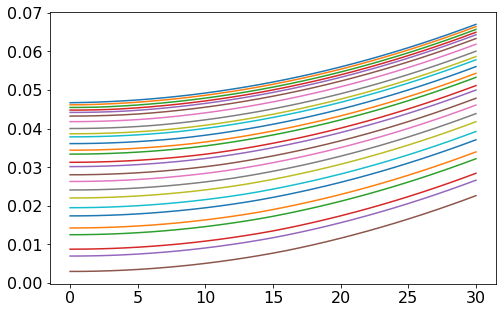

In [798]:
plt.plot(v0)
plt.show()

Text(0.5, 1.0, 'Emission,different levels of carbon concentration')

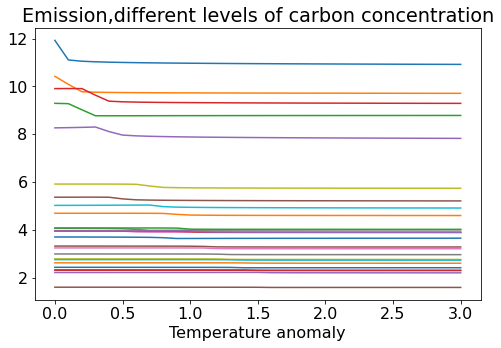

In [799]:
plt.plot(T_grid, Ca)
plt.xlabel("Temperature anomaly")
plt.title("Emission,different levels of carbon concentration")

# plt.show()
# plt.savefig("E_T.png", bbox_inches="tight", facecolor="w", edgecolor="w")

In [800]:
t_max = 100.
dt = 0.01
# dt = 1  # , Gigaton per year
gridpoints = (T_grid, C_grid)   
Ca_func = RegularGridInterpolator(gridpoints, Ca)

T_0 = 1.1
C_0 = 417 - 280
F_0 = (870 - 580) / 2.13 # total cumulated, as of now, preindustrial with Fo


def get_e(x):
    return Ca_func([x[0], x[1]])



# Vegetation growth function
def veggrowth_1d(T):
    if T < Tlow:
        return 0
    if (T >= Tlow) and (T < Topt1):
        return acc / (Topt1 - Tlow) * (T - Tlow)
    if (T >= Topt1) and (T <= Topt2):
        return acc
    if (T > Topt2) and (T < Thigh):
        #return acc
        return acc / (Topt2 - Thigh) * (T - Thigh)
    if T > Thigh:
        #return acc
        return 0

def oceanatmphysflux_1d(T):
    return 1 / tauc * (coc0 * (np.exp(-bP * (T - T0))))


def oceanbioflux_1d(T):
     return 1/tauc * (coc0 * (np.exp(bB * (T - T0))))

def oceanatmcorrflux_1d(C):
    return 1 / tauc * (- cod * C)


def mu_T(x):
#     Ri_t = 1 / cearth * (Q0 * (1 - p * alphaland - (1 - p) * alphaocean))
    Ro_t = 1. / cearth * ( - kappa * (x[0]) +  B * np.log(x[1] + C0) - B * np.log(C0))
    return Ro_t

def mu_C(x):
    # x[0] temperature anomaly, x[1] carbon anomaly
    Ca_t = Ca_func([x[0], x[1]])
    dC = Ca_t # - Volcan / C_preindustrial * x[1] # - wa * (x[1]) * vegcover - (1 - fracseaice)  * cod / tauc * (x[1]) + coc0 / tauc * (1 - fracseaice) * (np.exp( bB * (x[0] + T_preindustrial - T0)) - np.exp( bB * (T_preindustrial - T0))) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (x[0] + T_preindustrial - T0)) - np.exp(-bP * (T_preindustrial - T0)))
    return dC


years  = np.arange(0, t_max + dt, dt)
pers   = len(years)

hist      = np.zeros([pers, 2])
e_hist    = np.zeros([pers])


for tm in range(pers):
    if tm == 0:
        # initial points
        hist[0,:] = [T_0, C_0] # logL
        e_hist[0] = get_e(hist[0, :])

    else:
        # other periods
        e_hist[tm] = get_e(hist[tm-1,:])

        hist[tm,0] = hist[tm-1,0] + mu_T(hist[tm-1,:]) * dt
        hist[tm,1] = hist[tm-1,1] + mu_C(hist[tm-1,:]) * dt


ValueError: One of the requested xi is out of bounds in dimension 0

Text(0.5, 1.0, 'Emission in Gigaton, \n heat capacity = 0.107')

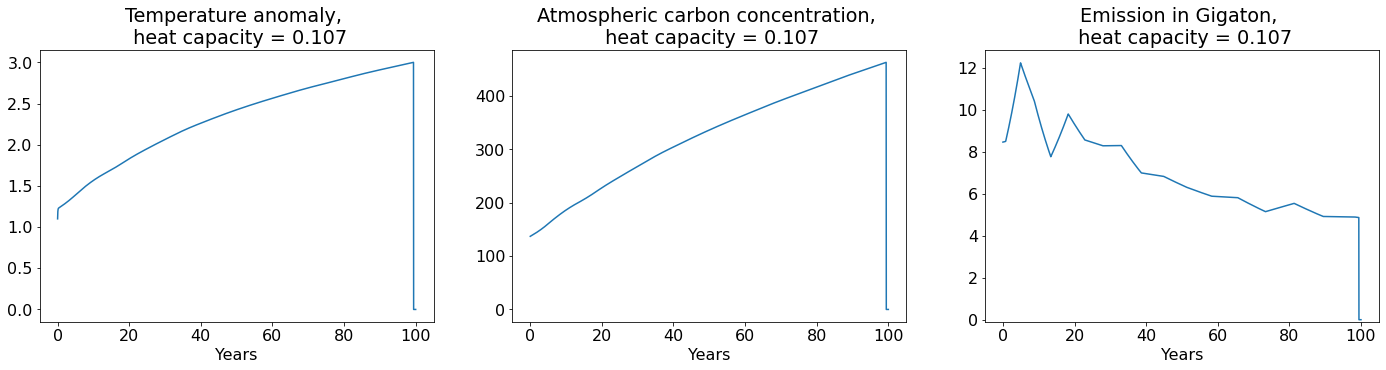

In [801]:
plt.subplots(1,3, figsize=(24,5))
plt.subplot(131)
plt.plot(years, hist[:, 0])
plt.xlabel("Years")
plt.title("Temperature anomaly, \n heat capacity = {}".format(cearth))
plt.subplot(132)
plt.plot(years, hist[:, 1])
plt.xlabel("Years")
plt.title("Atmospheric carbon concentration, \n heat capacity = {}".format(cearth))
plt.subplot(133)
plt.plot(years, e_hist * 2.13)
plt.xlabel("Years")
plt.ylim(-0.1)
plt.title("Emission in Gigaton, \n heat capacity = {}".format(cearth))
# plt.savefig("T_C_E_0p107_Ca.png", bbox_inches="tight", facecolor="w", edgecolor="w")

In [711]:
# np.save("Et_opt_cearth10.npy", hist[:, 0])

In [784]:
Et = e_hist * 2.13

Text(0.5, 1.0, 'Emission in GtC')

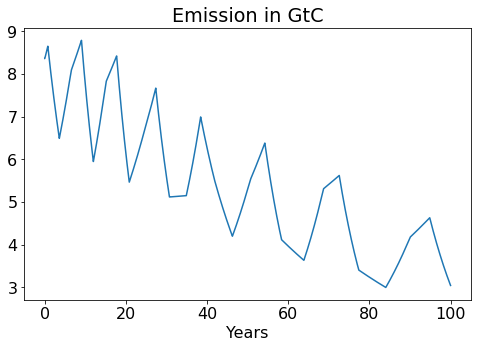

In [785]:
plt.plot(years, Et)
plt.xlabel("Years")
plt.title("Emission in GtC")

In [716]:
def DYDT(t, y):
    T = y[0]
    C = y[1]

    T = y[0]
    C = y[1]

    dT = 1. / cearth * ( - kappa * T + B * np.log(C + C0) - B * np.log(C0))
#     dT -= Ro(T, C)
    Ws = np.random.normal(size=(2,1))
#     dC = Volcan
    dC = Yam(t) - Volcan / C_preindustrial * C  # + (1 - fracseaice) * cod / tauc * C) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T + T_preindustrial - T0) - np.exp(-bP * (T_preindustrial - T0)))) + coc0 / tauc * (1 - fracseaice) * (np.exp(bB * (T + T_preindustrial - T0) - np.exp(bB * (T_preindustrial - T0))))   # biological pump flux * fraction sea ice
#     dC += oceanbioflux(T) * (1 - fracseaice(T))      # biological pump flux * fraction sea ice
#     dC += oceanatmcorrflux(C) * (1 - fracseaice)    # correction parameter
  # correction parameter

    return dT, dC

In [717]:
#Nullclines
T_values = np.linspace(0, 20, 201)
C_values = np.linspace(0, 2000, 200)

z = np.zeros((len(C_values), len(T_values), 2))
for i, C_value in enumerate(C_values):
    for j, T_value in enumerate(T_values):
        z[i, j, :] = DYDT(0, [T_value, C_value])

z = np.abs(z)**0.2 * np.sign(z)

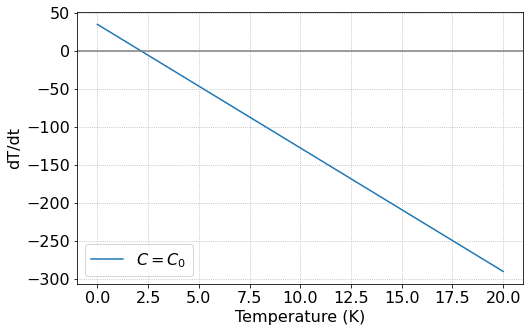

In [718]:
plt.plot(T_values, [dydt(0, [val, C0])[0] for val in T_values], label=r'$C=C_{0}$')
#ax.tick_params(axis='both', which='major', labelsize=12)
plt.axhline(0, color='gray')
plt.legend()
plt.xlabel('Temperature (K)', fontsize = 16)
plt.ylabel('dT/dt', fontsize = 16)
#plt.ylabel(r'$\dot{T}$')
plt.grid(linestyle=':')
# plt.ylim([-10, 10])

Text(0.5, 1.0, 'dT/dt')

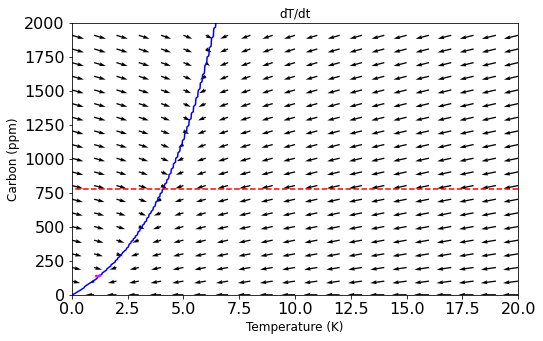

In [719]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8, 5))
plt.rcParams.update({'font.size': 16})
plt.xticks(fontsize=16)
zmax = np.percentile(np.abs(z), 95, axis=(0, 1))
#axs.contourf(T_values, C_values, z[..., 0], 20, cmap='coolwarm', vmin=-zmax, vmax=zmax)
axs.contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs.contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs.quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs.plot(hist[:, 0], hist[:,1], 'magenta', linewidth=2.5)
axs.set_xlabel('Temperature (K)', fontsize =12)
axs.set_ylabel('Carbon (ppm)', fontsize=12)
axs.set_title('dT/dt', fontsize =12)
#axs.set_title('$\dot T$')


In [720]:
#Nullclines
T_values = np.linspace(0, 20, 201)
C_values = np.linspace(0, 2000, 200)

z = np.zeros((len(C_values), len(T_values), 2))
for i, C_value in enumerate(C_values):
    for j, T_value in enumerate(T_values):
        z[i, j, :] = DYDT(-1, [T_value, C_value])

z = np.abs(z)**0.2 * np.sign(z)

Text(0.5, 1.0, 'Velocity field, at year 100')

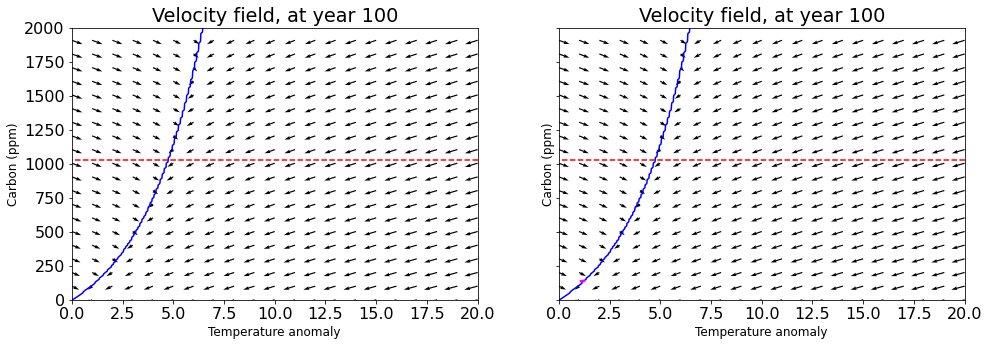

In [721]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(2 * 8, 5))
# plt.rcParams.update({'font.size': 16})
# plt.xticks(fontsize=16)
# 1
zmax = np.percentile(np.abs(z), 95, axis=(0, 1))
#axs.contourf(T_values, C_values, z[..., 0], 20, cmap='coolwarm', vmin=-zmax, vmax=zmax)
axs[0].contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs[0].contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs[0].quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs[0].set_xlabel('Temperature anomaly', fontsize =12)
axs[0].set_ylabel('Carbon (ppm)', fontsize =12)
# axs[0].text(1.0025 * 10, C0, r'$\frac{dC}{dt} = 0$', verticalalignment='center', fontsize=12)
# axs[0].text(1.0025 * 10, C0 + 180, r'$\frac{dT}{dt} = 0$', verticalalignment='center', fontsize=12)
axs[0].set_title("Velocity field, at year 100")
# 2
axs[1].contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs[1].contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs[1].quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs[1].plot(hist[:, 0], hist[:,1], 'magenta', linewidth=2.5)
axs[1].set_xlabel('Temperature anomaly', fontsize =12)
axs[1].set_ylabel('Carbon (ppm)', fontsize =12)
axs[1].set_title("Velocity field, at year 100")
#axs.set_title('$\dot T$')

# plt.savefig("dT_dC.pdf")